# GeoCoding to get Overseas Chinese Population in the world 

In [1]:
import geopy
import pandas as pd
from geopy.geocoders import MapBox
# import geocoders
import numpy as np
import geopandas as gpd


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import libpysal as ps

In [2]:
# load the data 
pop_data = pd.read_csv('data/chinese_diaspora.csv')


In [3]:
border_data = gpd.read_file("data/world-administrative-boundaries/world-administrative-boundaries.shp") 

<AxesSubplot:>

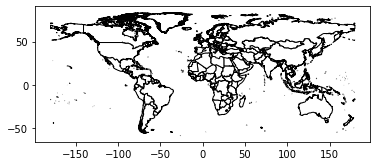

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
border_data.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})

In [5]:
pop_data

,Continent and country or area,Year,Total Population (millions),Number of overseas Chinese (thousands),Source,"Overseas Chinese per 10,000 total population",Year.1,Number of overseas Chinese (thousands).1,Average annual growth rate: 2000s (percentage)
0,Indonesia,2011,248.00,8010.72,"3,4",323.01,2001,7163.32,1.12
1,Thailand,2011,64.26,7512.60,"3,4",1169.06,2001,6861.82,0.91
2,Malaysia,2011,28.73,6540.80,"3,4",2266.47,2001,5749,1.30
3,Singapore,2011,5.26,2808.30,"3,4",5344.05,2001,2565.3,0.91
4,Philippines,2011,95.83,1243.16,"3,4",129.72,2001,1073.65,1.48
...,...,...,...,...,...,...,...,...,...
73,Nigeria,2011,160.34,25.42,"3,4",1.59,2001,4.14,19.90
74,Madagascar,2011,21.85,18.00,"3,4",8.24,2001,28,-4.32
75,Zimbabwe,2011,12.75,6.10,4,4.78,2001,0.2,40.75
76,Gabon,2011,1.53,5.64,4,36.77,2001,0.1,49.67


## clean data


In [6]:
#select columns 
pop_data_2 = pop_data.iloc[:, [0,3]]
# pop_data

In [7]:
# Add column name
pop_data_2.columns =['name', 'Overseas_Chineses_Thousands']

# Remove NAs
pop_data_3 = pop_data_2.dropna()

pop_data_3.head()

,name,Overseas_Chineses_Thousands
0,Indonesia,8010.72
1,Thailand,7512.60
2,Malaysia,6540.80
3,Singapore,2808.30
4,Philippines,1243.16


In [8]:
border_data

,status,color_code,region,iso3,continent,name,iso_3166_1_,french_shor,geometry
0,Member State,SMR,Southern Europe,SMR,Europe,San Marino,SM,Saint-Marin,"POLYGON ((12.40913 43.90842, 12.40352 43.92092..."
1,Member State,SYR,Western Asia,SYR,Asia,Syrian Arab Republic,SY,RÃ©publique arabe syrienne,"POLYGON ((42.35562 37.10693, 42.37833 37.07206..."
2,Member State,LVA,Northern Europe,LVA,Europe,Latvia,LV,Lettonie,"POLYGON ((27.37206 57.53564, 27.42500 57.53194..."
3,Member State,CPV,Western Africa,CPV,Africa,Cape Verde,CV,Cabo Verde,"MULTIPOLYGON (((-24.36556 14.81292, -24.39000 ..."
4,Member State,ZMB,Eastern Africa,ZMB,Africa,Zambia,ZM,Zambie,"POLYGON ((32.94040 -9.40508, 32.93944 -9.41583..."
...,...,...,...,...,...,...,...,...,...
251,FR Territory,FRA,Caribbean,MTQ,Americas,Martinique,MQ,Martinique,"POLYGON ((-60.81695 14.47333, -60.82056 14.455..."
252,Member State,MYS,South-Eastern Asia,MYS,Asia,Malaysia,MY,Malaisie,"MULTIPOLYGON (((111.41152 2.37639, 111.36804 2..."
253,Member State,KEN,Eastern Africa,KEN,Africa,Kenya,KE,Kenya,"MULTIPOLYGON (((41.13805 -2.12444, 41.09416 -2..."
254,PT Territory,PRT,Southern Europe,None,Europe,Madeira Islands,None,Madeira Islands,"POLYGON ((-17.10250 32.82333, -17.05306 32.809..."


In [9]:
border_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   status       255 non-null    object  
 1   color_code   255 non-null    object  
 2   region       252 non-null    object  
 3   iso3         238 non-null    object  
 4   continent    256 non-null    object  
 5   name         256 non-null    object  
 6   iso_3166_1_  236 non-null    object  
 7   french_shor  256 non-null    object  
 8   geometry     256 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 18.1+ KB


In [10]:
border_simple = border_data[['name','geometry', 'color_code']]

border_simple.head()

,name,geometry,color_code
0,San Marino,"POLYGON ((12.40913 43.90842, 12.40352 43.92092...",SMR
1,Syrian Arab Republic,"POLYGON ((42.35562 37.10693, 42.37833 37.07206...",SYR
2,Latvia,"POLYGON ((27.37206 57.53564, 27.42500 57.53194...",LVA
3,Cape Verde,"MULTIPOLYGON (((-24.36556 14.81292, -24.39000 ...",CPV
4,Zambia,"POLYGON ((32.94040 -9.40508, 32.93944 -9.41583...",ZMB


In [11]:
df  = pop_data_3.merge(border_simple, on='name', how='left')

# with pd.option_context('display.max_rows', None,):
#     print(df)

df

,name,Overseas_Chineses_Thousands,geometry,color_code
0,Indonesia,8010.72,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",IDN
1,Thailand,7512.60,"MULTIPOLYGON (((99.66804 6.49639, 99.65263 6.4...",THA
2,Malaysia,6540.80,"MULTIPOLYGON (((111.41152 2.37639, 111.36804 2...",MYS
3,Singapore,2808.30,"POLYGON ((103.95997 1.32083, 103.84192 1.25903...",SGP
4,Philippines,1243.16,"MULTIPOLYGON (((120.25360 5.23333, 120.22560 5...",PHL
...,...,...,...,...
73,Nigeria,25.42,"MULTIPOLYGON (((7.20361 4.38056, 7.18028 4.377...",NGA
74,Madagascar,18.00,"MULTIPOLYGON (((49.83361 -17.08973, 49.82722 -...",MDG
75,Zimbabwe,6.10,"POLYGON ((30.41576 -15.63187, 30.41729 -15.642...",ZWE
76,Gabon,5.64,"MULTIPOLYGON (((9.00778 -0.76778, 9.00222 -0.7...",GAB


In [12]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [20]:
dfx = df[['name','Overseas_Chineses_Thousands','color_code']]

In [21]:
dfx.to_csv('data/test_overseas_chinese.csv', encoding='utf-8', index=False)

In [ ]:
df = gpd.GeoDataFrame(df, geometry='geometry')

In [ ]:
df.to_file("data/overseas chinese population.gpkg", driver="GPKG")

In [ ]:
# the template. where data from the csv will be formatted to geojson
template = \
   ''' \
   { "type" : "Feature",
       "geometry" : {
           "type" : "Point",
           "coordinates" : [%s, %s]},
       "properties" : { "id" : %s, "unixTime" : "%s", "msgtext" : "%s", "userID": "%s"}
       },
   '''



# the head of the geojson file
output = \
   ''' \

{ "type" : "Feature Collection",
   "features" : [
   '''

In [ ]:
# loop through the csv by row skipping the first
iter = 0
for row in df:
   # iter += 1
   # if iter >= 2:
   id = row[2]
   lat = row[5]
   lon = row[6]
   unixTime = row[1]
   msgtext = row[3]
   userID = row[4]
   # output += template % (row[0], row[2], row[1], row[3], row[4])
   output += template % (lon, lat,  id,  unixTime, msgtext, userID)

# the tail of the geojson file
output += \
   ''' \
   ]

}
   '''

In [ ]:
# opens an geoJSON file to write the output
outFileHandle = open("filename.geojson", "w")
outFileHandle.write(output)
outFileHandle.close()

In [ ]:
#save to geojson 
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

In [ ]:
gdf.head()

In [ ]:
with open('overseas_chinese_geo.geojson' , 'w') as file:
    file.write(df.to_json())